## Merge and Create

Merging the extracted rows from the **sarig_rs_chem_exp** dataset to the **Gold dataset** that we created in the first notebook

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'H:\\ExploreSA'

In [5]:
#Import the pickled dataset
df = pd.read_pickle('Cleaned_datasets/gold_geochem_Final.pkl')

In [6]:
#Some stats on this DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19552741 entries, 14 to 30422287
Data columns (total 36 columns):
SAMPLE_NO             int64
SAMPLE_SOURCE_CODE    object
SAMPLE_SOURCE         object
ROCK_GROUP_CODE       object
ROCK_GROUP            object
LITHO_CODE            object
LITHO_CONF            object
LITHOLOGY_NAME        object
LITHO_MODIFIER        object
MAP_SYMBOL            object
STRAT_CONF            object
STRAT_NAME            object
COLLECTED_BY          object
COLLECTORS_NUMBER     object
COLLECTED_DATE        object
DRILLHOLE_NUMBER      float64
DH_NAME               object
DH_DEPTH_FROM         float64
DH_DEPTH_TO           float64
SITE_NO               int64
EASTING_GDA2020       float64
NORTHING_GDA2020      float64
ZONE_GDA2020          int64
LONGITUDE_GDA2020     float64
LATITUDE_GDA2020      float64
LONGITUDE_GDA94       float64
LATITUDE_GDA94        float64
SAMPLE_ANALYSIS_NO    int64
OTHER_ANALYSIS_ID     object
ANALYSIS_TYPE_DESC    object
LABORATOR

In [7]:
df.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,SAMPLE_SOURCE,ROCK_GROUP_CODE,ROCK_GROUP,LITHO_CODE,LITHO_CONF,LITHOLOGY_NAME,LITHO_MODIFIER,MAP_SYMBOL,STRAT_CONF,STRAT_NAME,COLLECTED_BY,COLLECTORS_NUMBER,COLLECTED_DATE,DRILLHOLE_NUMBER,DH_NAME,DH_DEPTH_FROM,DH_DEPTH_TO,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94,SAMPLE_ANALYSIS_NO,OTHER_ANALYSIS_ID,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,CHEM_METHOD_DESC
14,2078806,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25046,22/08/2008,280578.0,WRD30,1327.0,1328.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636520,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry
37,2078802,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25042,22/08/2008,280578.0,WRD30,1323.0,1324.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636516,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry
38,2078803,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25043,22/08/2008,280578.0,WRD30,1324.0,1325.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636517,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry
39,2078804,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25044,22/08/2008,280578.0,WRD30,1325.0,1326.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636518,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry
40,2078805,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25045,22/08/2008,280578.0,WRD30,1326.0,1327.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636519,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry


##### Number of unique DH's

In [8]:
len(df.DRILLHOLE_NUMBER.unique())

39372

##### A preview of some of the DH numbers

In [13]:
df.DRILLHOLE_NUMBER.unique()[300::400]

array([173474., 185371., 206174., 208899., 210525., 212974., 213374.,
       213774., 214862., 217752., 218152., 223172., 224116., 224516.,
       225449., 227365., 265079., 265400., 280568., 293083., 293527.,
       180083., 312847., 332731., 154949., 182399., 186936., 170771.,
       200800., 210739., 218684., 236488., 238286., 239196., 240546.,
       241103., 246756., 246169., 259155., 261481., 264756., 265895.,
       268444., 305089., 299232., 329965., 194634., 207856., 209288.,
       211193., 223114., 225612., 226357., 227198., 235233., 242046.,
       242449., 242854., 243257., 243661., 244060., 244461., 244863.,
       275883., 300792., 329826., 328921., 328379., 327670., 329725.,
       329413., 329274., 204822., 210103., 225706., 227444., 268875.,
       305226., 311071., 193625., 232532., 254963., 255261., 203208.,
       305366., 304459., 202229., 293794., 173743., 185580., 195536.,
       187564., 202385., 204064., 208292., 215334., 223928., 226970.])

##### Source of the DH data

In [14]:
df.SAMPLE_SOURCE.unique()

array(['Drill core', 'Sawn half drill core', 'Drill cuttings',
       'Drilled interval rock sample, type unspecified',
       'Filleted, shaved or ground core sample',
       'Sawn quarter drill core', 'A full face slice of core',
       'Aircore: consolidated sample from aircore drilling method',
       'Pulp / powdered rock of known origin, typically a lab return',
       'Core sludge', 'Calcrete', 'Auger sample from near surface',
       'Duplicate: a split from an existing sample.', 'Costean (trench)',
       'Drillhole log data - used in calculating values',
       'Stream sediment'], dtype=object)

##### List of commodities in this DF

In [15]:
df.CHEM_CODE.unique()

array(['U3O8', 'Au', 'Cu', 'Zn', 'Ag', 'As', 'Bi', 'Mo', 'Pb', 'U', 'Fe',
       'Ba', 'Ca', 'Cr', 'Mg', 'Mn', 'Na', 'Ni', 'Co', 'K', 'Sr', 'Y',
       'Sn', 'Ce', 'La', 'Se', 'Th', 'Sb', 'Rb', 'W', 'Cd', 'V', 'P',
       'Li', 'Cs', 'Ga', 'Hf', 'In', 'Nb', 'Ta', 'Te', 'Tl', 'Zr', 'Ti',
       'S', 'Pd', 'Pt', 'Al', 'Al2O3', 'CaO', 'K2O', 'LOI', 'MgO', 'MnO',
       'Na2O', 'P2O5', 'SiO2', 'TiO2', 'Fe2O3', 'Hg', 'Dy', 'Er', 'Eu',
       'Gd', 'Ho', 'Lu', 'Nd', 'Pr', 'Sm', 'Tb', 'Tm', 'Yb', 'Be', 'Sc',
       'Re', 'Ge', 'F', 'Ru', 'B', 'V2O5', 'Si', 'CO2', 'Br', 'Ir',
       'Cr2O3', 'FeO', 'SO3', 'Total', 'Cl', 'CPS_gamma', 'BaO', 'C',
       'SrO', 'Rh', 'H2O', 'Os', 'HMIN'], dtype=object)

#### Number of samples for every commodity

Let's try a count plot to see the number of samples for every mineral in the above list. Looks like Gold is dominating this list like expected.

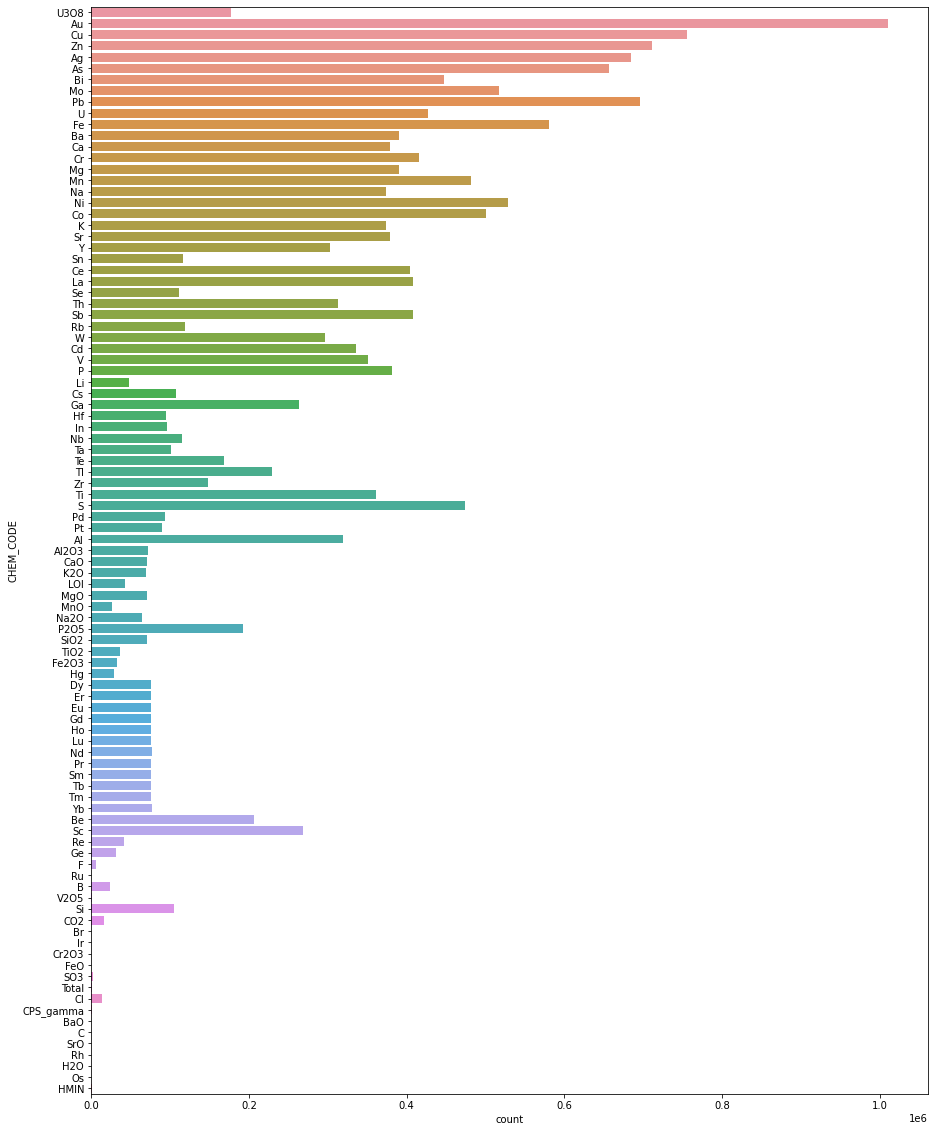

In [18]:
plt.figure(figsize=(15, 20))
sns.countplot(y = df.CHEM_CODE)

##### Now, Let's extract the Gold samples and do some cleaning up. Before that, how big is our DF with just the Gold samples. ~1M samples!!

In [20]:
df[df.CHEM_CODE == 'Au'].shape

(1010810, 36)

##### Looks like we have some cleaning up to do. We have some symbols (<,>) in our value column. We need to remove those so we can convert it into an integer. The "value" also seems to be in three different units.

In [22]:
df.UNIT.unique()

array(['ppm', 'ppb', '%', 'g/T', 'cps'], dtype=object)

In [27]:
df[(df.CHEM_CODE == 'Au') & (df.UNIT == 'ppm')].VALUE

16           0.76
17         104.33
18          12.91
19           0.96
20           1.16
            ...  
1540421      0.02
1540428     <0.02
1540433      0.04
1540439      0.02
1544350    <0.005
Name: VALUE, Length: 313497, dtype: object

In [29]:
#Removing the symbols
df['VALUE_INT'] = df.VALUE.apply(lambda x: str(x).strip('<').strip('>'))

In [30]:
#Converting the value column to float
df['VALUE_INT'] = df.VALUE_INT.astype(float)

##### Previewing the distribution of Au that are in ppb units

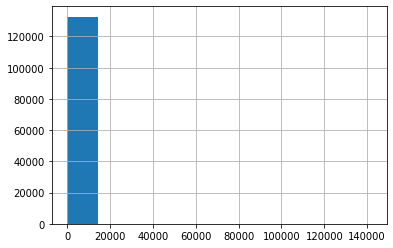

In [31]:
df[(df.CHEM_CODE == 'Au') & (df.UNIT == 'ppb')].VALUE_INT.hist()

In [32]:
#Different units of measurements
df.UNIT.unique()

array(['ppm', 'ppb', '%', 'g/T', 'cps'], dtype=object)

Converting all values to ppm

In [34]:
df['UNIT_PPM'] = np.where(df.UNIT == 'ppb', df.VALUE_INT/1000, (np.where(df.UNIT == '%', df.VALUE_INT*10000, df.VALUE_INT)))

Removing rows with units as CPS

In [33]:
#Number of data points containing the units cps
df[df.UNIT == 'cps'].shape

(774, 37)

In [35]:
df = df[df.UNIT != 'cps']

#### Now that we have done our basic cleanup, let's create our Gold DF.

In [37]:
df_au = df[df.CHEM_CODE == 'Au']

#### Distribution!

Lets look at the distribution of the *UNIT_PPM* values. Looks like we have a few outliers

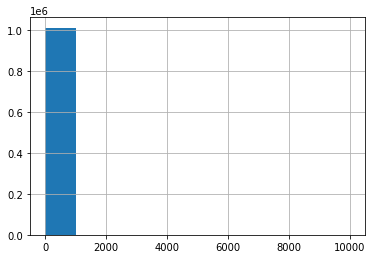

In [38]:
df_au.UNIT_PPM.hist()

##### We have 45 samples whose values are greater than 1500ppm. I'm sure the geo in you can explain this!

In [41]:
df_au[df_au.UNIT_PPM > 1500].shape

(45, 38)

##### Let us look at the distribution of a single drill hole

C:\Users\Russell\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


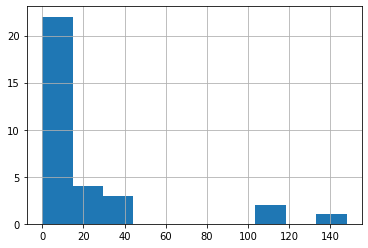

In [42]:
df_au[df.DRILLHOLE_NUMBER == 280141].UNIT_PPM.hist()

In [56]:
df.head()

,Unnamed: 0,SAMPLE_NO,SAMPLE_SOURCE_CODE,SAMPLE_SOURCE,ROCK_GROUP_CODE,ROCK_GROUP,LITHO_CODE,LITHO_CONF,LITHOLOGY_NAME,LITHO_MODIFIER,MAP_SYMBOL,STRAT_CONF,STRAT_NAME,COLLECTED_BY,COLLECTORS_NUMBER,COLLECTED_DATE,DRILLHOLE_NUMBER,DH_NAME,DH_DEPTH_FROM,DH_DEPTH_TO,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94,SAMPLE_ANALYSIS_NO,OTHER_ANALYSIS_ID,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,CHEM_METHOD_DESC,VALUE_INT,UNIT_PPM
0,14,2078806,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25046,22/08/2008,280578.0,WRD30,1327.0,1328.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636520,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry,5.0,5.0
1,37,2078802,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25042,22/08/2008,280578.0,WRD30,1323.0,1324.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636516,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry,5.0,5.0
2,38,2078803,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25043,22/08/2008,280578.0,WRD30,1324.0,1325.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636517,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry,5.0,5.0
3,39,2078804,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25044,22/08/2008,280578.0,WRD30,1325.0,1326.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636518,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry,5.0,5.0
4,40,2078805,DC,Drill core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN MINING CORPORATION LTD.,RA25045,22/08/2008,280578.0,WRD30,1326.0,1327.0,1984090,687490.6,6605633.24,53,136.957005,-30.667316,136.956995,-30.667302,1636519,NaN,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U3O8,5,ppm,XRF1,X-Ray Fluorescence Spectrometry,5.0,5.0


##### In order to visualize this data, we need to condense the dataset on the DH number and aggregate several stats for the *UNIT_PPM* value

In [45]:
df_au_DH = df_au.groupby('DRILLHOLE_NUMBER').UNIT_PPM.agg(['count', 'sum', 'mean', 'min', 'max'])
df_au_DH.columns = ['COUNT_UNIT_PPM', 'SUM_UNIT_PPM', 'MEAN_UNIT_PPM', 'MIN_UNIT_PPM', 'MAX_UNIT_PPM']
df_au_DH.head()

,COUNT_UNIT_PPM,SUM_UNIT_PPM,MEAN_UNIT_PPM,MIN_UNIT_PPM,MAX_UNIT_PPM
DRILLHOLE_NUMBER,,,,,
147530.0,7,0.007,0.001,0.001,0.001
147531.0,9,0.009,0.001,0.001,0.001
147532.0,7,0.007,0.001,0.001,0.001
147533.0,13,0.013,0.001,0.001,0.001
147534.0,14,0.014,0.001,0.001,0.001


##### Importing the gold catalog dataset that we created in the first notebook and previewing the DF

In [50]:
df_gold_cat = pd.read_csv('Cleaned_datasets/sarig_dh_details_Gold.csv')

C:\Users\Russell\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
df_gold_cat.head()

,DRILLHOLE_NO,DH_NAME,DH_OTHER_NAME,PACE_DH,PACE_ROUND_NO,REPRESENTATIVE_DH,REPRESENTATIVE_DH_COMMENTS,DH_UNIT_NO,MAX_DRILLED_DEPTH,MAX_DRILLED_DEPTH_DATE,CORED_LENGTH,TENEMENT,OPERATOR_CODE,OPERATOR_NAME,TARGET_COMMODITIES,MINERAL_CLASS,PETROLEUM_CLASS,STRATIGRAPHIC_CLASS,ENGINEERING_CLASS,SEISMIC_POINT_CLASS,WATER_WELL_CLASS,WATER_POINT_CLASS,DRILLING_METHODS,STRAT_LOG,LITHO_LOG,PETROPHYSICAL_LOG,GEOCHEMISTRY,PETROLOGY,BIOSTRATIGRAPHY,SPECTRAL_SCANNED,CORE_LIBRARY,REFERENCES,HISTORICAL_DOCUMENTS,COMMENTS,MAP_250000,MAP_100000,MAP_50K_NO,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94,HORIZ_ACCRCY_M,ELEVATION_M,INCLINATION,AZIMUTH,SURVEY_METHOD_CODE,SURVEY_METHOD
0,61638,BH34 34,NaN,N,NaN,N,1 OF 35 AUGER HOLES IN TAILINGS.,6628 14669,144.2,2017-06-17,0.0,,SDM,South Australia. Department of Mines and Energy.,"Gold, Copper",Y,N,N,N,N,N,N,Auger (Hand),N,N,N,N,N,N,N,Y,Y,Y,Tailings.,SI5409 ADELAIDE,6628 Adelaide,2,325873,308944.99,6129703.52,54,138.907534,-34.957203,138.907524,-34.957189,10.0,444.35,-90.0,NaN,GPSUN,GPS type unknown
1,147530,STO 1,NaN,N,NaN,N,NaN,6729 1506,155.5,1995-02-14,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,Y,N,N,Y,Y,N,NaN,SI5409 ADELAIDE,6729 Eudunda,2,195110,344854.61,6204552.69,54,139.314355,-34.288648,139.314345,-34.288633,20.0,102.00,-90.0,NaN,GPS,Global Positioning System
2,147531,STO 2,NaN,N,NaN,N,NaN,6729 1507,94.0,1995-02-15,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,N,N,N,Y,Y,Y,"BLOCKED OFF IN SANDS TERMINATED HOLE, Traverse...",SI5409 ADELAIDE,6729 Eudunda,2,195111,346316.55,6204575.59,54,139.330237,-34.288659,139.330227,-34.288644,20.0,78.00,-90.0,NaN,GPS,Global Positioning System
3,147532,STO 3,NaN,N,NaN,N,NaN,6729 1508,66.1,1995-02-16,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,N,N,N,Y,Y,N,NaN,SI5409 ADELAIDE,6729 Eudunda,2,195112,347322.45,6204592.72,54,139.341165,-34.288653,139.341155,-34.288638,20.0,66.00,-90.0,NaN,GPS,Global Positioning System
4,147533,STO 4,NaN,N,NaN,N,NaN,6729 1509,126.0,1995-02-17,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,N,Y,N,Y,Y,Y,"LOST CIRCULATION ABANDONDED HOLE, Traverse: T1...",SI5409 ADELAIDE,6729 Eudunda,2,195113,349603.60,6204634.65,54,139.365948,-34.288607,139.365938,-34.288593,20.0,55.00,-90.0,NaN,GPS,Global Positioning System


##### Let's check if we have any DH's in *df_au_DH* that are not in *df_gold_cat*. Looks like we got all of them!

In [57]:
[i for i in df_au_DH.index if i not in df_gold_cat.DRILLHOLE_NO.values]

[]

##### Merging on DH number!

In [58]:
merged_df = df_gold_cat.set_index('DRILLHOLE_NO').join(df_au_DH)

In [60]:
merged_df.head()

,DH_NAME,DH_OTHER_NAME,PACE_DH,PACE_ROUND_NO,REPRESENTATIVE_DH,REPRESENTATIVE_DH_COMMENTS,DH_UNIT_NO,MAX_DRILLED_DEPTH,MAX_DRILLED_DEPTH_DATE,CORED_LENGTH,TENEMENT,OPERATOR_CODE,OPERATOR_NAME,TARGET_COMMODITIES,MINERAL_CLASS,PETROLEUM_CLASS,STRATIGRAPHIC_CLASS,ENGINEERING_CLASS,SEISMIC_POINT_CLASS,WATER_WELL_CLASS,WATER_POINT_CLASS,DRILLING_METHODS,STRAT_LOG,LITHO_LOG,PETROPHYSICAL_LOG,GEOCHEMISTRY,PETROLOGY,BIOSTRATIGRAPHY,SPECTRAL_SCANNED,CORE_LIBRARY,REFERENCES,HISTORICAL_DOCUMENTS,COMMENTS,MAP_250000,MAP_100000,MAP_50K_NO,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94,HORIZ_ACCRCY_M,ELEVATION_M,INCLINATION,AZIMUTH,SURVEY_METHOD_CODE,SURVEY_METHOD,COUNT_UNIT_PPM,SUM_UNIT_PPM,MEAN_UNIT_PPM,MIN_UNIT_PPM,MAX_UNIT_PPM
DRILLHOLE_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61638,BH34 34,NaN,N,NaN,N,1 OF 35 AUGER HOLES IN TAILINGS.,6628 14669,144.2,2017-06-17,0.0,,SDM,South Australia. Department of Mines and Energy.,"Gold, Copper",Y,N,N,N,N,N,N,Auger (Hand),N,N,N,N,N,N,N,Y,Y,Y,Tailings.,SI5409 ADELAIDE,6628 Adelaide,2,325873,308944.99,6129703.52,54,138.907534,-34.957203,138.907524,-34.957189,10.0,444.35,-90.0,NaN,GPSUN,GPS type unknown,NaN,NaN,NaN,NaN,NaN
147530,STO 1,NaN,N,NaN,N,NaN,6729 1506,155.5,1995-02-14,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,Y,N,N,Y,Y,N,NaN,SI5409 ADELAIDE,6729 Eudunda,2,195110,344854.61,6204552.69,54,139.314355,-34.288648,139.314345,-34.288633,20.0,102.00,-90.0,NaN,GPS,Global Positioning System,7.0,0.007,0.001,0.001,0.001
147531,STO 2,NaN,N,NaN,N,NaN,6729 1507,94.0,1995-02-15,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,N,N,N,Y,Y,Y,"BLOCKED OFF IN SANDS TERMINATED HOLE, Traverse...",SI5409 ADELAIDE,6729 Eudunda,2,195111,346316.55,6204575.59,54,139.330237,-34.288659,139.330227,-34.288644,20.0,78.00,-90.0,NaN,GPS,Global Positioning System,9.0,0.009,0.001,0.001,0.001
147532,STO 3,NaN,N,NaN,N,NaN,6729 1508,66.1,1995-02-16,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,N,N,N,Y,Y,N,NaN,SI5409 ADELAIDE,6729 Eudunda,2,195112,347322.45,6204592.72,54,139.341165,-34.288653,139.341155,-34.288638,20.0,66.00,-90.0,NaN,GPS,Global Positioning System,7.0,0.007,0.001,0.001,0.001
147533,STO 4,NaN,N,NaN,N,NaN,6729 1509,126.0,1995-02-17,NaN,,SDM,South Australia. Department of Mines and Energy.,"Gold, Base Metals, Metalliferous Minerals",Y,N,N,N,N,N,N,Reverse Circulation,N,Y,Y,Y,N,Y,N,Y,Y,Y,"LOST CIRCULATION ABANDONDED HOLE, Traverse: T1...",SI5409 ADELAIDE,6729 Eudunda,2,195113,349603.60,6204634.65,54,139.365948,-34.288607,139.365938,-34.288593,20.0,55.00,-90.0,NaN,GPS,Global Positioning System,13.0,0.013,0.001,0.001,0.001


##### Now, to preview this spatially in QGIS, you can either convert it into a shapefile using *Geopandas* or export it as a *csv* and directy import it into QGIS as a delimited file. I prefer the latter as its easier.

In [61]:
merged_df.to_csv('Cleaned_datasets/df_Gold_Assay_merged.csv')

##### This is a basic bubble map showing the Mean AU ppm per well. A lot more can be done with this data but that is beyond the scope of this article. Good luck fellow explorers, may the AI be with you!

![xyz](Mean_Au.png)